Practical 4

In [1]:
# Q4.i) Run Apriori algorithm to find frequent itemsets and association rules for bakery dataset

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install efficient_apriori

In [4]:
 from efficient_apriori import apriori

In [9]:
df = pd.read_csv('1000i.csv', header=None, names=['receipt no.','food','quantity'])

In [10]:
df

,receipt no.,food,quantity
0,1,3,7
1,1,4,15
2,1,2,49
3,1,5,44
4,2,1,1
...,...,...,...
3533,999,5,35
3534,999,2,3
3535,1000,4,15
3536,1000,3,47


In [11]:
dict1 = {
    1:"milk",2:"sugar",3:"chocolate",4:"apples",5:"curd"
}

In [12]:
d1 = pd.DataFrame(df)

In [13]:
d1

,receipt no.,food,quantity
0,1,3,7
1,1,4,15
2,1,2,49
3,1,5,44
4,2,1,1
...,...,...,...
3533,999,5,35
3534,999,2,3
3535,1000,4,15
3536,1000,3,47


In [14]:
d2 = pd.DataFrame(df)

In [15]:
d2['food'].map(dict1)

0       chocolate
1          apples
2           sugar
3            curd
4            milk
          ...    
3533         curd
3534        sugar
3535       apples
3536    chocolate
3537    chocolate
Name: food, Length: 3538, dtype: object

In [16]:
d1['food'] = d1['food'].replace(dict1)

In [17]:
d1

,receipt no.,food,quantity
0,1,chocolate,7
1,1,apples,15
2,1,sugar,49
3,1,curd,44
4,2,milk,1
...,...,...,...
3533,999,curd,35
3534,999,sugar,3
3535,1000,apples,15
3536,1000,chocolate,47


In [18]:
d1.groupby(d1['receipt no.'])['food'].apply(lambda x: list(x))

receipt no.
1                        [chocolate, apples, sugar, curd]
2                                           [milk, sugar]
3                                            [milk, milk]
4                    [milk, milk, curd, curd, milk, milk]
5                     [apples, apples, sugar, curd, curd]
                              ...                        
996     [chocolate, sugar, chocolate, curd, chocolate,...
997                      [chocolate, curd, apples, sugar]
998                 [milk, chocolate, curd, apples, curd]
999                                  [sugar, curd, sugar]
1000                       [apples, chocolate, chocolate]
Name: food, Length: 1000, dtype: object

In [19]:
transactions = d1.groupby(d1['receipt no.'])['food'].apply(lambda x: list(x))

In [20]:
# a) Use minimum support as 50% and minimum confidence as 75%

itemsets, rules = apriori(transactions, min_support=0.5, min_confidence=0.75)

In [21]:
itemsets

{1: {('chocolate',): 507, ('apples',): 540, ('milk',): 542}}

In [22]:
rules

[]

In [27]:
itemset, rules = apriori(transactions, min_support=0.2, min_confidence=0.5)

In [28]:
itemset

{1: {('chocolate',): 507,
  ('apples',): 540,
  ('sugar',): 498,
  ('curd',): 493,
  ('milk',): 542},
 2: {('apples', 'chocolate'): 251,
  ('apples', 'curd'): 264,
  ('apples', 'milk'): 271,
  ('apples', 'sugar'): 258,
  ('chocolate', 'curd'): 232,
  ('chocolate', 'milk'): 251,
  ('chocolate', 'sugar'): 240,
  ('curd', 'milk'): 240,
  ('curd', 'sugar'): 230,
  ('milk', 'sugar'): 254}}

In [29]:
rules

[{curd} -> {apples},
 {milk} -> {apples},
 {apples} -> {milk},
 {sugar} -> {apples},
 {sugar} -> {milk}]

In [30]:
itemset.keys()

dict_keys([1, 2])

In [34]:
x = []

for i in itemset.keys():
  x.append(pd.Series(itemset[i]))

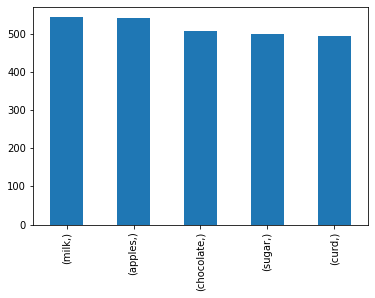

In [35]:
x[0].sort_values(ascending = False).plot.bar()

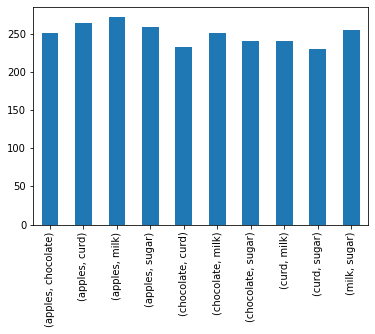

In [36]:
x[1].plot.bar()